<a href="https://colab.research.google.com/github/soapycat99/cs_4410/blob/main/KNN_with_tuning_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/mobile_fraud.csv')

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [37]:
data.isFraud.value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [47]:
df_fraud = data[data.isFraud ==1]
df_noFraud = data[data.isFraud ==0].head(20000)

In [48]:
df_noFraud.shape

(20000, 11)

In [49]:
data_subset = pd.concat([df_fraud,df_noFraud],axis=0)

In [50]:
data_subset.shape

(28213, 11)

In [51]:
import seaborn as sns

data_subset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

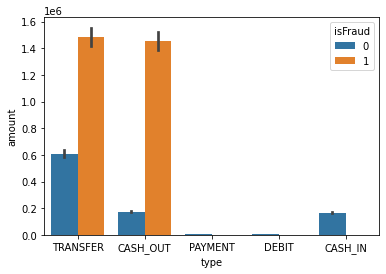

In [52]:
sns.barplot(x='type',y='amount', data=data_subset,hue='isFraud')

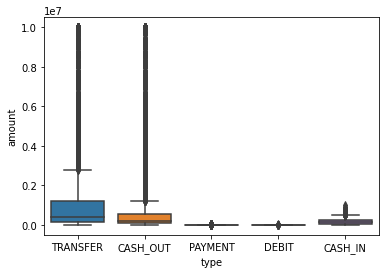

In [54]:
sns.boxplot(x='type',y='amount',data=data_subset)

In [56]:
data_subset['type'] = data_subset['type'].astype('category')

In [58]:
data_subset = data_subset.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'],axis=1)

In [60]:
type_dummy = pd.get_dummies(data_subset.type,prefix='type')
type_dummy.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,0,0,0,0,1
3,0,1,0,0,0
251,0,0,0,0,1
252,0,1,0,0,0
680,0,0,0,0,1


In [63]:
data_subset = pd.concat([data_subset,type_dummy],axis=1)
data_subset.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0,1,0,0,0,0,1,0,0,0
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0,1,0,0,0,0,1,0,0,0
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1


In [64]:
X = data_subset.drop(['isFraud','type','step'],axis=1).values

In [65]:
 y = data_subset.isFraud.values

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=5, stratify=y)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [73]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [74]:
knn.score(X_test, y_test)

0.9796786389413988

In [76]:
#Tuning the parameters
from sklearn.model_selection import GridSearchCV
import numpy as np
gs = {'n_neighbors' : np.arange(1,25)}

In [77]:
knn_gs = KNeighborsClassifier()

In [78]:
knn_param_search = GridSearchCV(knn_gs,gs,cv=10)

In [79]:
knn_param_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [80]:
knn_param_search.best_params_

{'n_neighbors': 1}

In [83]:
knn_param_search.best_score_

0.9801005476254602

In [87]:
knn.predict(X_test)


array([0, 1, 0, ..., 1, 1, 0])